<a href="https://colab.research.google.com/github/sulaksh26/SportsDunia/blob/main/SportsDunia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path = '/content/drive/MyDrive/Sports Dunia  -  BA/Dump3 (1) (1) (1) (1) (1) (1) (1) (1).xlsx'
df = pd.read_excel(file_path)

In [3]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ')

In [4]:
# Drop completely empty rows and unnamed index columns
df = df.dropna(how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
# Convert date columns if they exist
date_columns = ['Instance Date', 'Last Lead Act', 'Form Initiate']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [6]:
# Standardize key text columns
columns_to_clean = ['Course', 'Specialization', 'Lead Stage', 'Lead Status', 'Paid Applicant', 'Enrolment Status']
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().str.strip()

In [8]:
# Summary Statistics
print("Total Records:", len(df))
print("\nMissing Values:\n", df.isnull().sum())
print("\nLead Stage Distribution:\n", df['Lead Stage'].value_counts())
print("\nCourse Distribution:\n", df['Course'].value_counts())
print("\nPaid Applicant Distribution:\n", df['Paid Applications'].value_counts())

Total Records: 50000

Missing Values:
 Name                           1
Email                          0
Mobile                         0
Lead Origin                    0
Country                        0
State                          0
City                           0
Instance                       0
Instance Date                  0
Campaign                       0
Lead Stage                     0
Lead Status                    0
Registration Device        49880
Course                         0
Specialization                 0
Campus                         0
Last Lead Activity Date        0
Form Initiated             49495
Paid Applications          49901
Enrolment Status               0
dtype: int64

Lead Stage Distribution:
 Lead Stage
UNTOUCHED                33242
NO RESPONSE               6783
COLD                      6375
NOT INTERESTED            2306
WARM                       621
INVALID                    382
NOT ELIGIBLE               123
APPLICATION SUBMITTED      100
HO

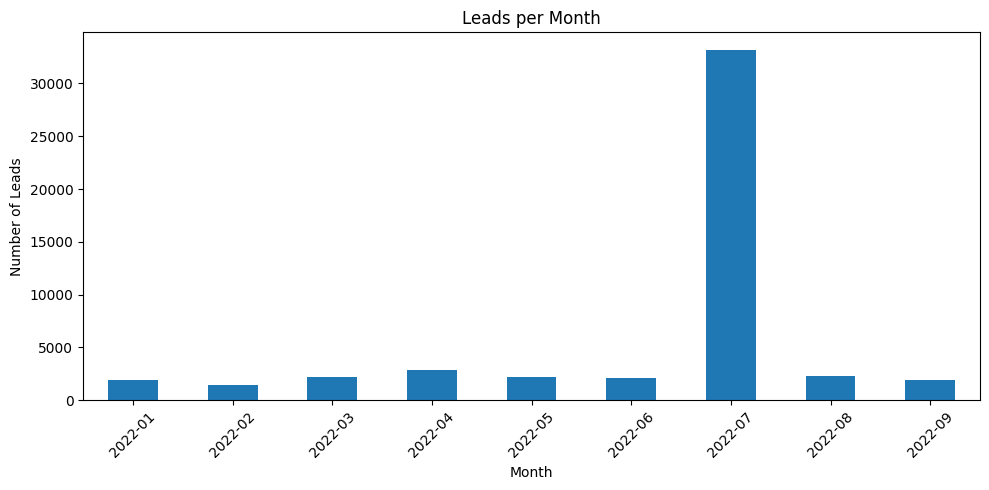

In [9]:
# Leads per Month
if 'Instance Date' in df.columns:
    df['Month'] = df['Instance Date'].dt.to_period('M')
    leads_per_month = df.groupby('Month').size()
    leads_per_month.plot(kind='bar', figsize=(10,5), title="Leads per Month")
    plt.ylabel("Number of Leads")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
# Course vs Paid Applicant
if 'Course' in df.columns and 'Paid Applicant' in df.columns:
    course_enroll = df.groupby('Course')['Paid Applicant'].value_counts().unstack().fillna(0)
    course_enroll.plot(kind='bar', stacked=True, figsize=(12, 6), title="Course vs Paid Applicant")
    plt.ylabel("Number of Leads")
    plt.xlabel("Course")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

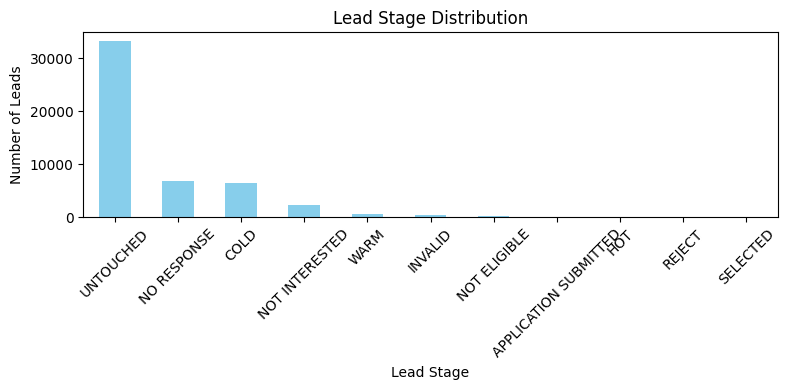

In [11]:
# Lead Stage Funnel
if 'Lead Stage' in df.columns:
    df['Lead Stage'].value_counts().plot(kind='bar', color='skyblue', figsize=(8,4), title="Lead Stage Distribution")
    plt.ylabel("Number of Leads")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
# Top States and Cities
if 'State' in df.columns:
    print("\nTop States:\n", df['State'].value_counts().head(10))

if 'City' in df.columns:
    print("\nTop Cities:\n", df['City'].value_counts().head(10))


Top States:
 State
Andhra Pradesh    7860
Karnataka         7681
Tamil Nadu        7187
Kerala            5564
West Bengal       5518
Telangana         3533
Uttar Pradesh     3330
Bihar             2208
Jharkhand         1517
Odisha             818
Name: count, dtype: int64

Top Cities:
 City
Bengaluru Rural    5804
Kolkata            3421
Chennai            3262
Hyderabad          2860
Anantapur           932
Kochi               861
Visakhapatnam       758
Guntur              705
Patna               680
Vijayawada          652
Name: count, dtype: int64
